In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import LanusStats as ls
from scipy import stats
import numpy as np

from mplsoccer import FontManager

URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [2]:
fbref = ls.Fbref()

In [48]:
ls.get_available_season_for_leagues('Fbref', 'Primera Division Argentina')

{'id': 21,
 'slug': 'Primera-Division',
 'seasons': {'2021', '2022', '2023', '2024'}}

In [49]:
df = fbref.get_all_player_season_stats("Primera Division Argentina", "2024")

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [50]:
df_players = df[0]

In [51]:
list(df_players.columns)

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos'

In [52]:
df_players.head(2)

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
0,Matías Abaldo,uy URU,FW,Gimnasia–LP,Primera Division Argentina,20-157,2004,10,9,760,...,34,4,3,0,0,0,37,2,1,66.7
1,Lucas Abascia,ar ARG,DF,Cen. Córdoba–SdE,Primera Division Argentina,28-272,1995,7,7,541,...,0,8,10,0,0,0,34,16,17,48.5


In [53]:
df_players['passing_Cmp'].iloc[:,0]

0      144
1      300
2       95
3       34
4      134
      ... 
882    323
883    175
884    146
885      0
886    206
Name: passing_Cmp, Length: 887, dtype: object

In [104]:
df_players["passes to 3rd per 100 passes"] = df_players["passing_1/3"].astype(int) / df_players["passing_Cmp"].iloc[:,0].astype(int)
df_players["prog carries per 100 touches"] = df_players["stats_PrgC"].astype(int) / df_players["possession_Touches"].astype(int)

stats_plot = {
    "Defensores": ["passing_PrgDist", "prog carries per 100 touches", "passing_xAG", "passing_xA", "passes to 3rd per 100 passes", "defense_TklW", "defense_Tkl%", "defense_Tkl+Int", "defense_Blocks", "possession_Att 3rd", "misc_Recov", "misc_Won%"]
}

stats_labels = {
    "Defensores": ["Distancia progresiva de pases", "Carreras prog. por 100 toques", "Goles esperados Asistidos", "Asistencias Esperadas", 'Pases al últ tercio por 100 pases', 'Entradas ganadas', "% de entradas ganadas", "Entradas + Intercepciones", 'Bloqueos', "Toques en últ tercio", 'Recuperaciones', '% de duelos aéreos ganados']
}

In [67]:
stats.percentileofscore(df_filt['passing_xA'].astype(float),float(player[stats_plot['Defensores'][3]]))

28.40236686390533

In [55]:
df_players['stats_90s'].astype(float).sort_values()

425     0.0
142     0.0
299     0.0
687     0.0
361     0.0
       ... 
699    13.0
184    13.0
700    13.0
82     13.0
852    13.0
Name: stats_90s, Length: 887, dtype: float64

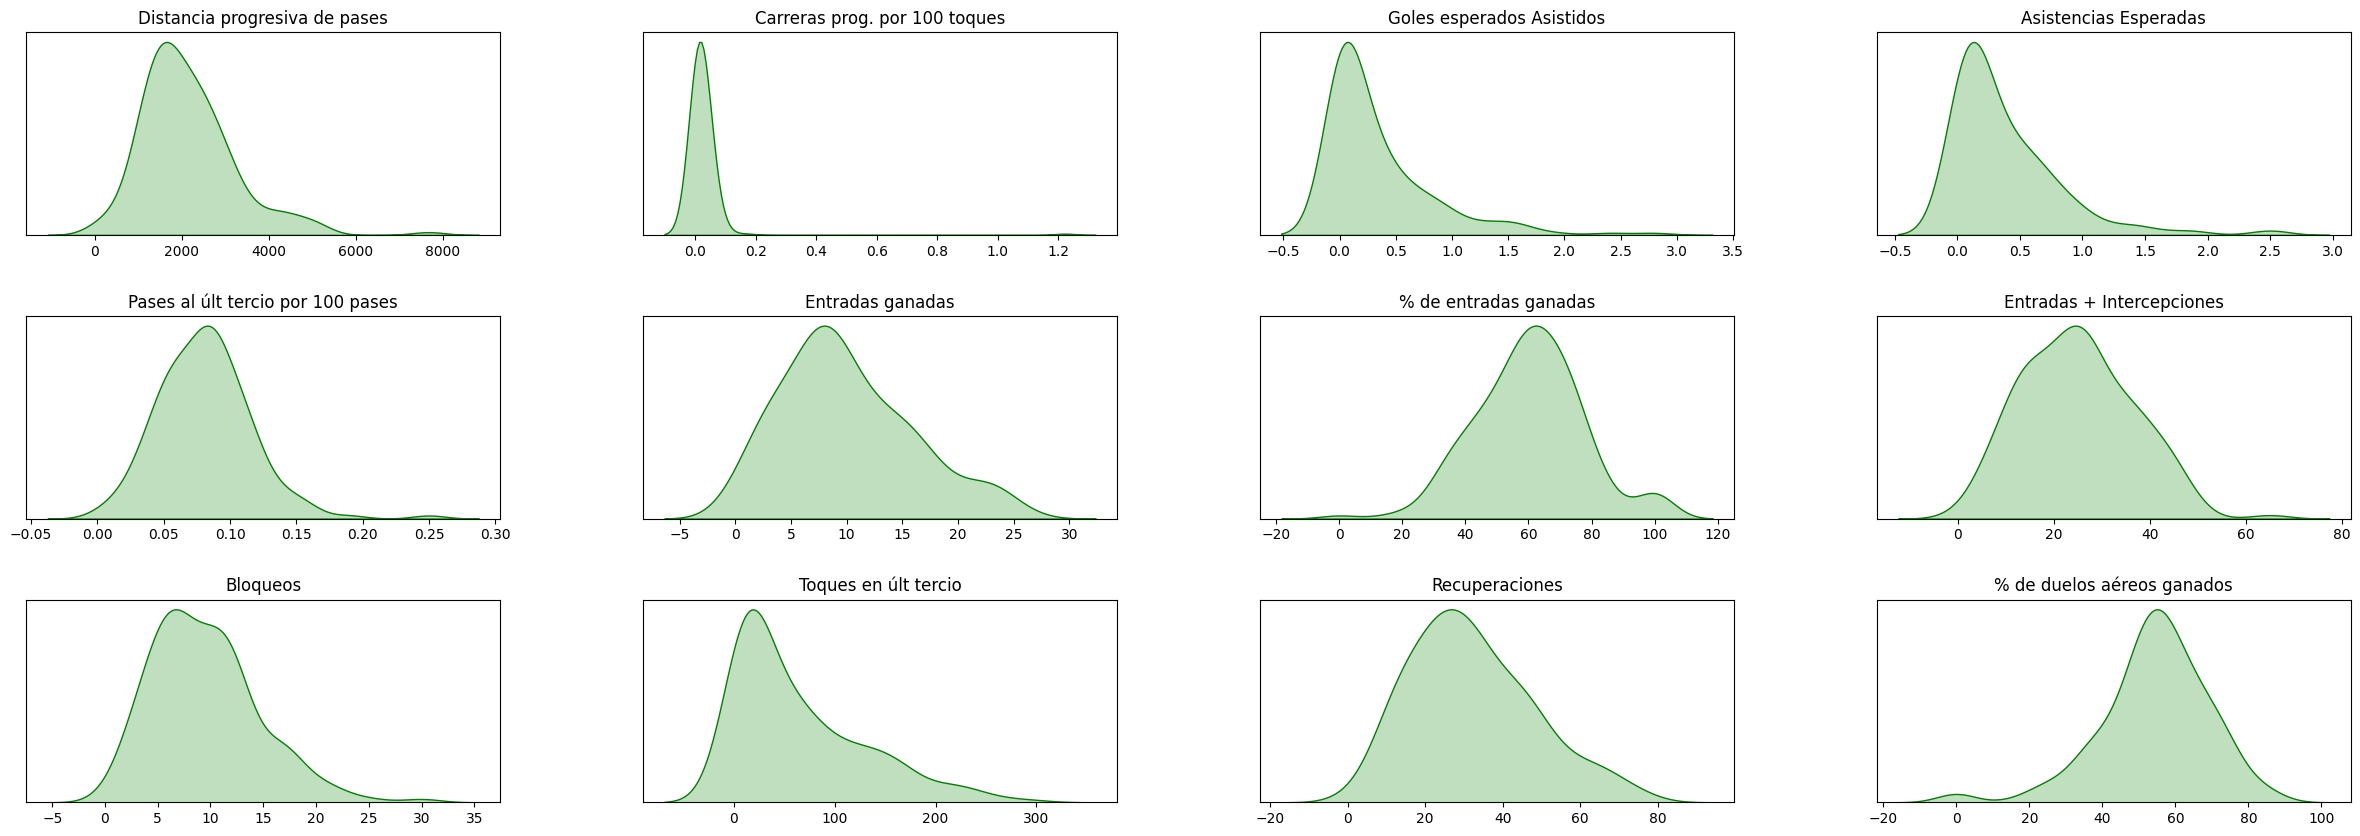

In [105]:
df_filt = df_players[(df_players['stats_Pos'].str.contains('DF')) & (df_players['stats_90s'].astype(float) > 4)]
player = df_filt[df_filt['Player'] == 'Valentín Gómez']
fig, axes = plt.subplots(3, 4, figsize=(30,10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta los valores según lo que necesites
col = 'green'
for i, ax in zip(range(len(stats_plot["Defensores"])), axes.reshape(-1)):
    stat = df_filt[stats_plot['Defensores'][i]].astype(float)
    sns.kdeplot(stat, color=col, fill=col, ax=ax)
    ## Percentile lines
    ax.set_title(f'{stats_labels["Defensores"][i]}')
    # Clean graph
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set(yticks=[])

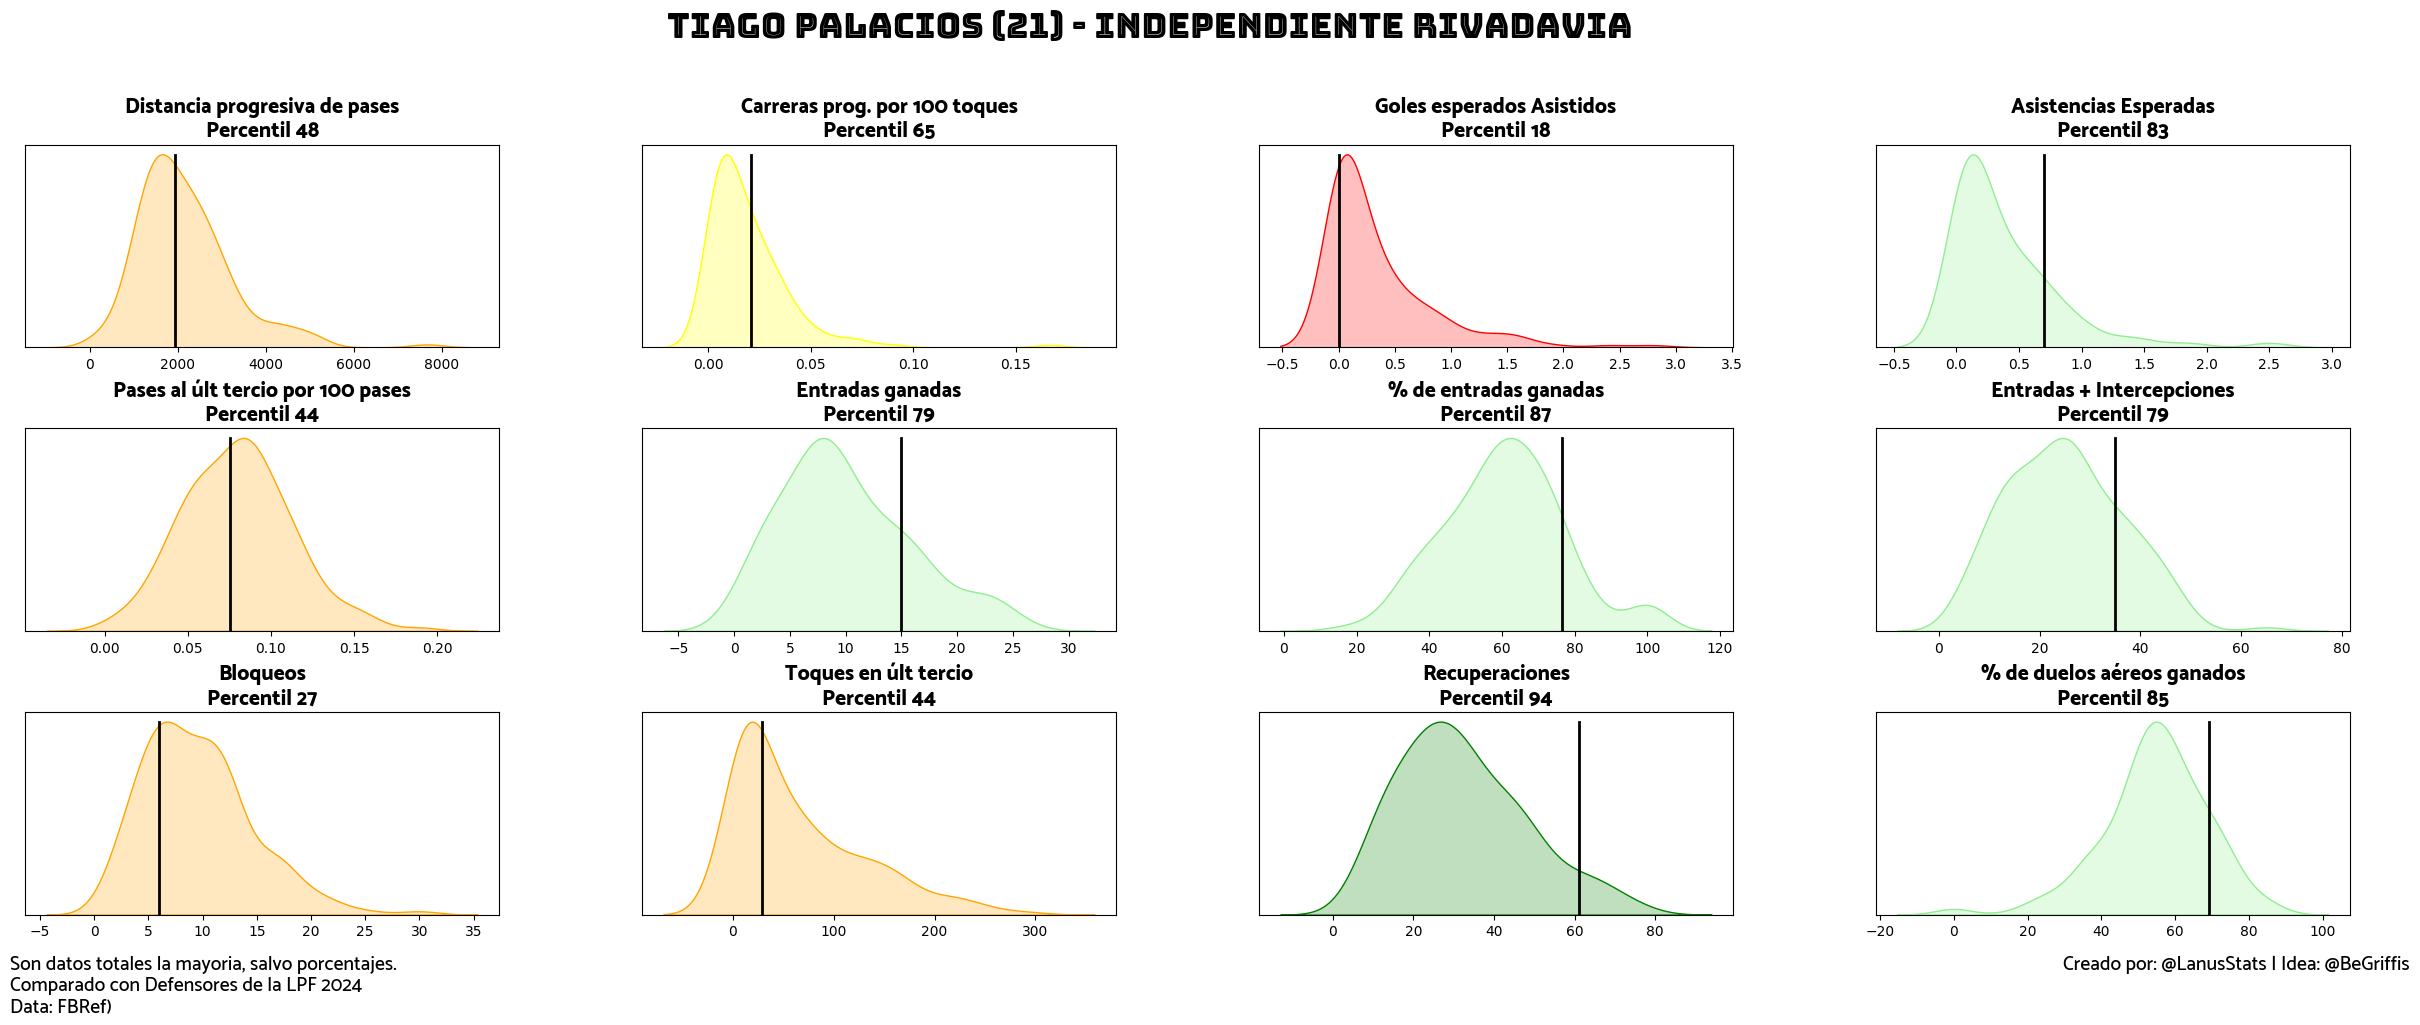

In [141]:
jugador = 'Tiago Palacios'

df_filt = df_players[(df_players['stats_Pos'].str.contains('DF')) & (df_players['stats_90s'].astype(float) > 4) & (df_players['prog carries per 100 touches'].astype(float) < 1)]
player = df_filt[df_filt['Player'] == jugador]
equipo = player['stats_Squad'].values[0]
edad = int(player['stats_Age'].str.split('-').values[0][0])
fig, axes = plt.subplots(3, 4, figsize=(30,10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta los valores según lo que necesites
for i, ax in zip(range(len(stats_plot["Defensores"])), axes.reshape(-1)):
    stat = df_filt[stats_plot['Defensores'][i]].astype(float)
    player_value = float(player[stats_plot['Defensores'][i]])
    percentile = stats.percentileofscore(stat,player_value)
    col = np.where(percentile <= 25, 'red',
                   np.where((percentile > 25) & (percentile <= 50), 'orange',
                            np.where((percentile > 50) & (percentile <= 70), 'yellow',
                                     np.where((percentile > 70) & (percentile <= 90), 'lightgreen', 'green'))))
    sns.kdeplot(stat, color=str(col), fill=col, ax=ax)
    ax.axvline(player_value, 0, .95, lw=2, color='black')
    ## Percentile lines
    ax.set_title(f'{stats_labels["Defensores"][i]}\nPercentil {int(percentile)}', fontproperties=catamaran.prop, size = 15)
    # Clean graph
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set(yticks=[])
    
fig.text(0.12,0.07,
                'Son datos totales la mayoria, salvo porcentajes.\nComparado con Defensores de la LPF 2024\nData: FBRef)',
                fontsize=14, color='black', va='top', ha='left', fontproperties=catamaran2.prop)
fig.text(0.92,0.07,
                'Creado por: @LanusStats | Idea: @BeGriffis',
                fontsize=14, color='black', va='top', ha='right', fontproperties=catamaran2.prop)

fig.text(.5,1.0,
                f'{jugador} ({edad}) - {equipo}',
                fontsize=25, color="black", fontweight="bold", va='center', ha='center', fontproperties=titulo.prop)

plt.savefig('test.png', dpi=300, bbox_inches='tight')